In [34]:
import datetime
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (15.0, 10.0)


## First we need to get the last three years data.
This code will ensure that it's up to date

In [15]:
today_epoch = (datetime.date.today() - datetime.timedelta(days=1)).strftime("%s")
threeyear_epoch = (datetime.date.today() - datetime.timedelta(days=(365*3))).strftime("%s")


## Download that 3 year data

In [14]:
data_url = "https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=%s&period2=%s&interval=1d&events=history" % (threeyear_epoch,today_epoch)
req = requests.get(data_url)
url_content = req.content
csv_file = open('msft-3-year.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [24]:
df = pd.read_csv('msft-3-year.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-15,73.589996,73.589996,73.040001,73.220001,70.183228,19181400
1,2017-08-16,73.339996,74.099998,73.169998,73.650002,70.595390,18150400
2,2017-08-17,73.580002,73.870003,72.400002,72.400002,69.397232,22977500
3,2017-08-18,72.269997,72.839996,71.930000,72.489998,69.483498,18761500
4,2017-08-21,72.470001,72.480003,71.699997,72.150002,69.157600,17734800


In [23]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,124.244271,125.476724,122.896486,124.271433,122.336732,3.003948e+07
std,35.504328,36.024890,34.952636,35.558417,36.549969,1.461961e+07
min,72.250000,72.480003,71.699997,72.150002,69.157600,7.425600e+06
25%,97.060000,97.877503,96.110001,97.192502,94.253317,2.056220e+07
50%,112.454998,113.285000,111.574997,112.345001,110.328942,2.611850e+07
75%,144.342495,145.997501,142.924999,144.242497,142.963600,3.438745e+07
max,216.330002,217.639999,211.570007,216.539993,216.539993,1.112421e+08


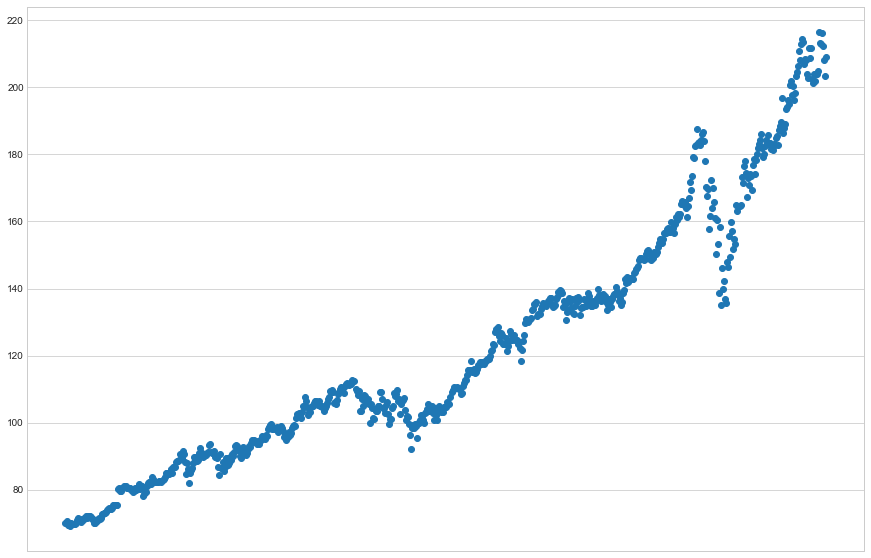

In [35]:
fig, ax = plt.subplots()
rule = rrulewrapper(YEARLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
plt.plot_date(df["Date"], df["Adj Close"])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)